In [214]:
import pandas as pd 

In [215]:
df = pd.read_csv('APPA_data_merged2.csv')

In [216]:
df

,Stazione,Inquinante,Data,Valore,Unità di misura
0,A22 (Avio),Biossido di Azoto,2017-01-01 01:00:00,54.0,µg/mc
1,A22 (Avio),Biossido di Azoto,2017-01-01 02:00:00,58.0,µg/mc
2,A22 (Avio),Biossido di Azoto,2017-01-01 03:00:00,54.0,µg/mc
3,A22 (Avio),Biossido di Azoto,2017-01-01 04:00:00,54.0,µg/mc
4,A22 (Avio),Biossido di Azoto,2017-01-01 05:00:00,50.0,µg/mc
...,...,...,...,...,...
2278753,Via Bolzano,PM10,2022-07-07 20:00:00,15.0,µg/mc
2278754,Via Bolzano,PM10,2022-07-07 21:00:00,13.0,µg/mc
2278755,Via Bolzano,PM10,2022-07-07 22:00:00,16.0,µg/mc
2278756,Via Bolzano,PM10,2022-07-07 23:00:00,14.0,µg/mc


In [217]:
import scipy as sc
import scipy.stats

In [218]:
df["Data"] = pd.to_datetime(df["Data"], format="%Y-%m-%d %H:%M:%S")
df.dtypes

Stazione                   object
Inquinante                 object
Data               datetime64[ns]
Valore                    float64
Unità di misura            object
dtype: object

In [219]:
df['Inquinante'] = df['Inquinante'].astype('category')
df.dtypes

Stazione                   object
Inquinante               category
Data               datetime64[ns]
Valore                    float64
Unità di misura            object
dtype: object

In [221]:
df

,Stazione,Inquinante,Data,Valore,Unità di misura
0,A22 (Avio),Biossido di Azoto,2017-01-01 01:00:00,54.0,µg/mc
1,A22 (Avio),Biossido di Azoto,2017-01-01 02:00:00,58.0,µg/mc
2,A22 (Avio),Biossido di Azoto,2017-01-01 03:00:00,54.0,µg/mc
3,A22 (Avio),Biossido di Azoto,2017-01-01 04:00:00,54.0,µg/mc
4,A22 (Avio),Biossido di Azoto,2017-01-01 05:00:00,50.0,µg/mc
...,...,...,...,...,...
2278753,Via Bolzano,PM10,2022-07-07 20:00:00,15.0,µg/mc
2278754,Via Bolzano,PM10,2022-07-07 21:00:00,13.0,µg/mc
2278755,Via Bolzano,PM10,2022-07-07 22:00:00,16.0,µg/mc
2278756,Via Bolzano,PM10,2022-07-07 23:00:00,14.0,µg/mc


In [222]:
df_during = pd.concat(
    df.set_index("Data").loc[f"{year}-03-09":f"{year}-05-18"] 
    for year 
    in range(2012, 2023)
)
df_during

,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2012-03-09 00:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
2012-03-09 01:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
2012-03-09 02:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
2012-03-09 03:00:00,Borgo Valsugana,Biossido di Azoto,18.0,µg/mc
2012-03-09 04:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
...,...,...,...,...
2022-05-18 19:00:00,Via Bolzano,PM10,22.0,µg/mc
2022-05-18 20:00:00,Via Bolzano,PM10,23.0,µg/mc
2022-05-18 21:00:00,Via Bolzano,PM10,25.0,µg/mc


In [223]:
df_before = pd.concat(
    df.set_index("Data").loc[f"{year}-01-01":f"{year}-03-08"] 
    for year 
    in range(2012, 2023)
)
df_before

/var/folders/_c/fvfck0397w75sly9yb8mm1jm0000gn/T/ipykernel_3222/873069056.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.set_index("Data").loc[f"{year}-01-01":f"{year}-03-08"]


,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2012-01-01 01:00:00,Borgo Valsugana,Biossido di Azoto,37.0,µg/mc
2012-01-01 02:00:00,Borgo Valsugana,Biossido di Azoto,39.0,µg/mc
2012-01-01 03:00:00,Borgo Valsugana,Biossido di Azoto,36.0,µg/mc
2012-01-01 04:00:00,Borgo Valsugana,Biossido di Azoto,34.0,µg/mc
2012-01-01 05:00:00,Borgo Valsugana,Biossido di Azoto,31.0,µg/mc
...,...,...,...,...
2022-03-08 19:00:00,Via Bolzano,PM10,22.0,µg/mc
2022-03-08 20:00:00,Via Bolzano,PM10,29.0,µg/mc
2022-03-08 21:00:00,Via Bolzano,PM10,32.0,µg/mc


In [224]:
df_after = pd.concat(
    df.set_index("Data").loc[f"{year}-05-19":f"{year}-07-27"] 
    for year 
    in range(2012, 2023)
)
df_after

,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2012-05-19 00:00:00,Borgo Valsugana,Biossido di Azoto,36.0,µg/mc
2012-05-19 01:00:00,Borgo Valsugana,Biossido di Azoto,30.0,µg/mc
2012-05-19 02:00:00,Borgo Valsugana,Biossido di Azoto,27.0,µg/mc
2012-05-19 03:00:00,Borgo Valsugana,Biossido di Azoto,25.0,µg/mc
2012-05-19 04:00:00,Borgo Valsugana,Biossido di Azoto,21.0,µg/mc
...,...,...,...,...
2022-07-07 20:00:00,Via Bolzano,PM10,15.0,µg/mc
2022-07-07 21:00:00,Via Bolzano,PM10,13.0,µg/mc
2022-07-07 22:00:00,Via Bolzano,PM10,16.0,µg/mc


In [225]:
lockdown_mean = df_during.groupby(['Inquinante']).mean().rename(columns={'Valore': 'Lockdown'})
lockdown_mean

,Lockdown
Inquinante,
Biossido Zolfo,1.303288
Biossido di Azoto,24.595382
Ossido di Carbonio,0.592430
Ozono,64.634225
PM10,18.737126
PM2.5,13.550005


In [226]:
before_mean = df_before.groupby(['Inquinante']).mean().rename(columns={'Valore': 'Before'})
before_mean

,Before
Inquinante,
Biossido Zolfo,2.735279
Biossido di Azoto,42.524535
Ossido di Carbonio,0.783968
Ozono,27.951321
PM10,27.589059
PM2.5,23.113832


In [227]:
after_mean = df_after.groupby(['Inquinante']).mean().rename(columns={'Valore': 'After'})
after_mean

,After
Inquinante,
Biossido Zolfo,1.342181
Biossido di Azoto,19.280404
Ossido di Carbonio,0.526877
Ozono,80.835498
PM10,16.755985
PM2.5,11.605962


In [228]:
df_merge = before_mean.merge(lockdown_mean, left_on="Inquinante", right_on="Inquinante")


In [229]:
df_merge = df_merge.merge(after_mean, left_on="Inquinante", right_on="Inquinante")

In [230]:
df_merge

,Before,Lockdown,After
Inquinante,,,
Biossido Zolfo,2.735279,1.303288,1.342181
Biossido di Azoto,42.524535,24.595382,19.280404
Ossido di Carbonio,0.783968,0.592430,0.526877
Ozono,27.951321,64.634225,80.835498
PM10,27.589059,18.737126,16.755985
PM2.5,23.113832,13.550005,11.605962


In [232]:
pollutans = ["Biossido Zolfo", "Biossido di Azoto", "Ossido di Carbonio", "Ozono", "PM10", "PM2.5"]
d = {"Biossido Zolfo": pd.DataFrame(), "Biossido di Azoto": pd.DataFrame(), "Ossido di Carbonio": pd.DataFrame(), "Ozono": pd.DataFrame(), "PM10": pd.DataFrame(), "PM2.5": pd.DataFrame()}
d_2020 = {"Biossido Zolfo": pd.DataFrame(), "Biossido di Azoto": pd.DataFrame(), "Ossido di Carbonio": pd.DataFrame(), "Ozono": pd.DataFrame(), "PM10": pd.DataFrame(), "PM2.5": pd.DataFrame()}
number = len(pollutans)
for x in range (number):
    #print(x)
    d[pollutans[x]] = df_during[df_during.Inquinante == pollutans[x]].loc[:"2020-01-01", "Valore"]
    #during_baseline = df_during[df_during.Inquinante == pollutans[x]].loc[:"2020-01-01", "Valore"]
    d_2020[pollutans[x]] = df_during.loc[df_during.Inquinante == pollutans[x]].loc["2020-01-01":"2020-12-31", "Valore"]

/var/folders/_c/fvfck0397w75sly9yb8mm1jm0000gn/T/ipykernel_3222/864462433.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  d_2020[pollutans[x]] = df_during.loc[df_during.Inquinante == pollutans[x]].loc["2020-01-01":"2020-12-31", "Valore"]


In [233]:
print(d_2020["PM2.5"])

Data
2020-03-09 00:00:00    15.0
2020-03-09 01:00:00    15.0
2020-03-09 02:00:00    14.0
2020-03-09 03:00:00    12.0
2020-03-09 04:00:00    11.0
                       ... 
2020-05-18 21:00:00    17.0
2020-05-18 22:00:00    17.0
2020-05-18 22:00:00    17.0
2020-05-18 23:00:00    11.0
2020-05-18 23:00:00    11.0
Name: Valore, Length: 5143, dtype: float64


In [234]:
for p in pollutans:
    print(f"T-Test with {p}: has result of {(sc.stats.ttest_ind(d[p],d_2020[p], equal_var=False))}")

T-Test with Biossido Zolfo: has result of Ttest_indResult(statistic=-14.934170516919645, pvalue=2.358542269110043e-48)
T-Test with Biossido di Azoto: has result of Ttest_indResult(statistic=109.13971001293709, pvalue=0.0)
T-Test with Ossido di Carbonio: has result of Ttest_indResult(statistic=0.3219619973731751, pvalue=0.7474924099586893)
T-Test with Ozono: has result of Ttest_indResult(statistic=-44.39880732915174, pvalue=0.0)
T-Test with PM10: has result of Ttest_indResult(statistic=11.87085866659254, pvalue=2.123365660406537e-32)
T-Test with PM2.5: has result of Ttest_indResult(statistic=9.686808382455798, pvalue=4.512379465360058e-22)


In [235]:
pollutans = ["Biossido Zolfo", "Biossido di Azoto", "Ossido di Carbonio", "Ozono", "PM10", "PM2.5"]
d = {"Biossido Zolfo": pd.DataFrame(), "Biossido di Azoto": pd.DataFrame(), "Ossido di Carbonio": pd.DataFrame(), "Ozono": pd.DataFrame(), "PM10": pd.DataFrame(), "PM2.5": pd.DataFrame()}
d_2020 = {"Biossido Zolfo": pd.DataFrame(), "Biossido di Azoto": pd.DataFrame(), "Ossido di Carbonio": pd.DataFrame(), "Ozono": pd.DataFrame(), "PM10": pd.DataFrame(), "PM2.5": pd.DataFrame()}
number = len(pollutans)
for x in range (number):
    #print(x)
    d[pollutans[x]] = df_during[df_during.Inquinante == pollutans[x]].loc["2017-01-01":"2020-01-01", "Valore"]
    #during_baseline = df_during[df_during.Inquinante == pollutans[x]].loc[:"2020-01-01", "Valore"]
    d_2020[pollutans[x]] = df_during.loc[df_during.Inquinante == pollutans[x]].loc["2020-01-01":"2020-12-31", "Valore"]

/var/folders/_c/fvfck0397w75sly9yb8mm1jm0000gn/T/ipykernel_3222/3819532839.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  d[pollutans[x]] = df_during[df_during.Inquinante == pollutans[x]].loc["2017-01-01":"2020-01-01", "Valore"]
/var/folders/_c/fvfck0397w75sly9yb8mm1jm0000gn/T/ipykernel_3222/3819532839.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  d_2020[pollutans[x]] = df_during.loc[df_during.Inquinante == pollutans[x]].loc["2020-01-01":"2020-12-31", "Valore"]


In [236]:
for p in pollutans:
    print(f"T-Test with {p}: has result of {(sc.stats.ttest_ind(d[p],d_2020[p], equal_var=False))}")

T-Test with Biossido Zolfo: has result of Ttest_indResult(statistic=-4.436476046775601, pvalue=9.446180595417222e-06)
T-Test with Biossido di Azoto: has result of Ttest_indResult(statistic=86.70526432548952, pvalue=0.0)
T-Test with Ossido di Carbonio: has result of Ttest_indResult(statistic=-9.552081213894901, pvalue=1.7188735424698273e-21)
T-Test with Ozono: has result of Ttest_indResult(statistic=-30.92766283997542, pvalue=9.967741864440865e-205)
T-Test with PM10: has result of Ttest_indResult(statistic=-2.5133708311231464, pvalue=0.011963770197623416)
T-Test with PM2.5: has result of Ttest_indResult(statistic=1.2933783985866885, pvalue=0.1959049487874244)


In [237]:
pollutans = ["Biossido Zolfo", "Biossido di Azoto", "Ossido di Carbonio", "Ozono", "PM10", "PM2.5"]
d = {"Biossido Zolfo": pd.DataFrame(), "Biossido di Azoto": pd.DataFrame(), "Ossido di Carbonio": pd.DataFrame(), "Ozono": pd.DataFrame(), "PM10": pd.DataFrame(), "PM2.5": pd.DataFrame()}
d_2020 = {"Biossido Zolfo": pd.DataFrame(), "Biossido di Azoto": pd.DataFrame(), "Ossido di Carbonio": pd.DataFrame(), "Ozono": pd.DataFrame(), "PM10": pd.DataFrame(), "PM2.5": pd.DataFrame()}
number = len(pollutans)
for x in range (number):
    #print(x)
    d[pollutans[x]] = df_during[df_during.Inquinante == pollutans[x]].loc["2019-01-01":"2020-01-01", "Valore"]
    #during_baseline = df_during[df_during.Inquinante == pollutans[x]].loc[:"2020-01-01", "Valore"]
    d_2020[pollutans[x]] = df_during.loc[df_during.Inquinante == pollutans[x]].loc["2020-01-01":"2020-12-31", "Valore"]

/var/folders/_c/fvfck0397w75sly9yb8mm1jm0000gn/T/ipykernel_3222/3043970762.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  d[pollutans[x]] = df_during[df_during.Inquinante == pollutans[x]].loc["2019-01-01":"2020-01-01", "Valore"]
/var/folders/_c/fvfck0397w75sly9yb8mm1jm0000gn/T/ipykernel_3222/3043970762.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  d_2020[pollutans[x]] = df_during.loc[df_during.Inquinante == pollutans[x]].loc["2020-01-01":"2020-12-31", "Valore"]


In [238]:
for p in pollutans:
    print(f"T-Test with {p}: has result of {(sc.stats.ttest_ind(d[p],d_2020[p], equal_var=False))}")

T-Test with Biossido Zolfo: has result of Ttest_indResult(statistic=-3.4075843077621992, pvalue=0.0006628933158737051)
T-Test with Biossido di Azoto: has result of Ttest_indResult(statistic=50.38762734482432, pvalue=0.0)
T-Test with Ossido di Carbonio: has result of Ttest_indResult(statistic=0.7038401586481795, pvalue=0.4815566242315832)
T-Test with Ozono: has result of Ttest_indResult(statistic=-18.409269397014004, pvalue=4.44012569284646e-75)
T-Test with PM10: has result of Ttest_indResult(statistic=-29.367827836274117, pvalue=1.338889274418689e-186)
T-Test with PM2.5: has result of Ttest_indResult(statistic=-13.562771506636597, pvalue=1.534002552862105e-41)


In [245]:
import plotly.express as px


fig = px.box(df_during, x="Data", y="Valore", color="2020")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Stazione', 'Inquinante', 'Valore', 'Unità di misura'] but received: Data

In [213]:
df_during

,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2012-03-09 00:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
2012-03-09 01:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
2012-03-09 02:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
2012-03-09 03:00:00,Borgo Valsugana,Biossido di Azoto,18.0,µg/mc
2012-03-09 04:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
...,...,...,...,...
2022-05-18 19:00:00,Via Bolzano,PM10,22.0,µg/mc
2022-05-18 20:00:00,Via Bolzano,PM10,23.0,µg/mc
2022-05-18 21:00:00,Via Bolzano,PM10,25.0,µg/mc


In [212]:
df_during.reset_index()

for i, row in df_during.iterrows():
    if df_during.Data == "2019-03-09 00:00:00":
        print(i)
    if df_during.Data == "2020-05-18 23:00:00":
        print(i)
#df_during.iloc["2019-03-09 00:00:00":"2020-05-18 23:00:00"]

AttributeError: 'DataFrame' object has no attribute 'Data'

In [243]:
df_during

,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2012-03-09 00:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
2012-03-09 01:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
2012-03-09 02:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
2012-03-09 03:00:00,Borgo Valsugana,Biossido di Azoto,18.0,µg/mc
2012-03-09 04:00:00,Borgo Valsugana,Biossido di Azoto,17.0,µg/mc
...,...,...,...,...
2022-05-18 19:00:00,Via Bolzano,PM10,22.0,µg/mc
2022-05-18 20:00:00,Via Bolzano,PM10,23.0,µg/mc
2022-05-18 21:00:00,Via Bolzano,PM10,25.0,µg/mc


In [206]:
mean_2019 = df_during.groupby(['Data']).mean()
mean_2019

,Valore
Data,
2012-03-09 00:00:00,19.327273
2012-03-09 01:00:00,19.009091
2012-03-09 02:00:00,18.418182
2012-03-09 03:00:00,18.190909
2012-03-09 04:00:00,18.580952
...,...
2022-05-18 19:00:00,35.529630
2022-05-18 20:00:00,34.937037
2022-05-18 21:00:00,33.311111


In [251]:
df_during2020 = pd.concat(
    df.set_index("Data").loc[f"{year}-03-09":f"{year}-05-18"] 
    for year 
    in range(2020, 2021)
)
df_during2020

,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2020-03-09 00:00:00,A22 (Avio),Biossido di Azoto,47.0,µg/mc
2020-03-09 01:00:00,A22 (Avio),Biossido di Azoto,41.0,µg/mc
2020-03-09 02:00:00,A22 (Avio),Biossido di Azoto,41.0,µg/mc
2020-03-09 03:00:00,A22 (Avio),Biossido di Azoto,34.0,µg/mc
2020-03-09 04:00:00,A22 (Avio),Biossido di Azoto,37.0,µg/mc
...,...,...,...,...
2020-05-18 21:00:00,Via Bolzano,PM10,24.0,µg/mc
2020-05-18 22:00:00,Via Bolzano,PM10,27.0,µg/mc
2020-05-18 22:00:00,Via Bolzano,PM10,27.0,µg/mc


In [252]:
df_during2019 = pd.concat(
    df.set_index("Data").loc[f"{year}-03-09":f"{year}-05-18"] 
    for year 
    in range(2019, 2020)
)
df_during2019

,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2019-03-09 00:00:00,A22 (Avio),Biossido di Azoto,61.0,µg/mc
2019-03-09 01:00:00,A22 (Avio),Biossido di Azoto,54.0,µg/mc
2019-03-09 02:00:00,A22 (Avio),Biossido di Azoto,49.0,µg/mc
2019-03-09 05:00:00,A22 (Avio),Biossido di Azoto,42.0,µg/mc
2019-03-09 06:00:00,A22 (Avio),Biossido di Azoto,44.0,µg/mc
...,...,...,...,...
2019-05-18 19:00:00,Via Bolzano,PM10,12.0,µg/mc
2019-05-18 20:00:00,Via Bolzano,PM10,14.0,µg/mc
2019-05-18 21:00:00,Via Bolzano,PM10,16.0,µg/mc


In [270]:
during2019_avg = df_during2019.groupby(['Inquinante'], ).mean()
during2019_avg

,Valore
Inquinante,
Biossido Zolfo,1.332946
Biossido di Azoto,24.350018
Ossido di Carbonio,0.554234
Ozono,67.835533
PM10,13.669409
PM2.5,10.383101


In [271]:
during2020_avg = df_during2020.groupby(['Inquinante'], ).mean()
during2020_avg

,Valore
Inquinante,
Biossido Zolfo,1.402180
Biossido di Azoto,14.936072
Ossido di Carbonio,0.551920
Ozono,76.046329
PM10,17.534038
PM2.5,12.392767


In [269]:
during2020_stations = df_during2020.groupby(['Inquinante','Stazione']).mean()
during2020_stations

Valore
Inquinante         Stazione                   
Biossido Zolfo     A22 (Avio)              NaN
                   Borgo Valsugana         NaN
                   Monte Gaza              NaN
                   Parco S. Chiara    1.402180
                   Piana Rotaliana         NaN
                   Riva del Garda          NaN
                   Rovereto                NaN
                   Via Bolzano             NaN
Biossido di Azoto  A22 (Avio)        23.285309
                   Borgo Valsugana   12.969645
                   Monte Gaza         5.451724
                   Parco S. Chiara   18.165138
                   Piana Rotaliana   11.641173
                   Riva del Garda    14.045872
                   Rovereto          13.100459
                   Via Bolzano       22.397708
Ossido di Carbonio A22 (Avio)         0.484232
                   Borgo Valsugana         NaN
                   Monte Gaza              NaN
                   Parco S. Chiara         NaN
                   Piana Rotaliana         NaN
                   Riva del Garda          NaN
                   Rovereto                NaN
                   Via Bolzano        0.619530
Ozono              A22 (Avio)              NaN
                   Borgo Valsugana   63.410684
                   Monte Gaza       104.877223
                   Parco S. Chiara   70.922458
                   Piana Rotaliana   69.677029
                   Riva del Garda    71.496271
                   Rovereto          75.851894
                   Via Bolzano             NaN
PM10               A22 (Avio)        16.059199
                   Borgo Valsugana   20.044597
                   Monte Gaza        13.932681
                   Parco S. Chiara   18.020702
                   Piana Rotaliana   17.874566
                   Riva del Garda    20.026857
                   Rovereto          15.764167
                   Via Bolzano       18.515850
PM2.5              A22 (Avio)              NaN
                   Borgo Valsugana   12.244058
                   Monte Gaza              NaN
                   Parco S. Chiara   12.748131
                   Piana Rotaliana         NaN
                   Riva del Garda          NaN
                   Rovereto          12.177487
                   Via Bolzano             NaN

In [268]:
during2019_stations = df_during2019.groupby(['Inquinante','Stazione']).mean()
during2019_stations

Valore
Inquinante         Stazione                  
Biossido Zolfo     A22 (Avio)             NaN
                   Borgo Valsugana        NaN
                   Monte Gaza             NaN
                   Parco S. Chiara   1.332946
                   Piana Rotaliana        NaN
                   Riva del Garda         NaN
                   Rovereto               NaN
                   Via Bolzano            NaN
Biossido di Azoto  A22 (Avio)       40.690909
                   Borgo Valsugana  20.866160
                   Monte Gaza        5.541667
                   Parco S. Chiara  28.001164
                   Piana Rotaliana  17.331776
                   Riva del Garda   23.653085
                   Rovereto         20.807916
                   Via Bolzano      38.125948
Ossido di Carbonio A22 (Avio)        0.597669
                   Borgo Valsugana        NaN
                   Monte Gaza             NaN
                   Parco S. Chiara        NaN
                   Piana Rotaliana        NaN
                   Riva del Garda         NaN
                   Rovereto               NaN
                   Via Bolzano       0.511888
Ozono              A22 (Avio)             NaN
                   Borgo Valsugana  57.147522
                   Monte Gaza       98.307870
                   Parco S. Chiara  61.423166
                   Piana Rotaliana  63.644802
                   Riva del Garda   60.737028
                   Rovereto         65.159429
                   Via Bolzano            NaN
PM10               A22 (Avio)       12.413434
                   Borgo Valsugana  16.975638
                   Monte Gaza        8.550388
                   Parco S. Chiara  14.113623
                   Piana Rotaliana  12.069591
                   Riva del Garda   16.288283
                   Rovereto         12.317101
                   Via Bolzano      16.477378
PM2.5              A22 (Avio)             NaN
                   Borgo Valsugana  10.960519
                   Monte Gaza             NaN
                   Parco S. Chiara  10.079953
                   Piana Rotaliana        NaN
                   Riva del Garda         NaN
                   Rovereto         10.098652
                   Via Bolzano            NaN

In [280]:
during2019_stations.shape

(48, 1)

In [281]:
list(df_during2020.groupby(['Inquinante','Stazione']))[0]

(('Biossido Zolfo', 'Parco S. Chiara'),
                             Stazione      Inquinante  Valore Unità di misura
 Data                                                                        
 2020-03-09 00:00:00  Parco S. Chiara  Biossido Zolfo     2.0           µg/mc
 2020-03-09 01:00:00  Parco S. Chiara  Biossido Zolfo     2.0           µg/mc
 2020-03-09 02:00:00  Parco S. Chiara  Biossido Zolfo     2.0           µg/mc
 2020-03-09 03:00:00  Parco S. Chiara  Biossido Zolfo     2.0           µg/mc
 2020-03-09 04:00:00  Parco S. Chiara  Biossido Zolfo     1.0           µg/mc
 ...                              ...             ...     ...             ...
 2020-05-18 21:00:00  Parco S. Chiara  Biossido Zolfo     1.0           µg/mc
 2020-05-18 22:00:00  Parco S. Chiara  Biossido Zolfo     1.0           µg/mc
 2020-05-18 22:00:00  Parco S. Chiara  Biossido Zolfo     1.0           µg/mc
 2020-05-18 23:00:00  Parco S. Chiara  Biossido Zolfo     1.0           µg/mc
 2020-05-18 23:00:00  Pa

# t-test on pollutant and stations

In [413]:
pollutants = df_during2020.Inquinante.drop_duplicates()
stations = df_during2020.Stazione.drop_duplicates()

r = []

for pollutant in pollutants:
    for station in stations:

        df_test_19 = df_during2019.loc[
            (df_during2019.Inquinante == pollutant) 
            & (df_during2019.Stazione == station),
            "Valore"
        ]

        df_test_20 = df_during2020.loc[
            (df_during2020.Inquinante == pollutant) 
            & (df_during2020.Stazione == station),
            "Valore"
        ]

        p_value = sc.stats.ttest_ind(
            df_test_19,
            df_test_20,
            equal_var=False
        )

        r.append({
            "pollutant": pollutant,
            "station": station,
            "p_value": p_value.pvalue,
        })

r = pd.DataFrame(r)
r["significance"] = r.p_value < 0.05
r.dropna()

,pollutant,station,p_value,significance
0,Biossido di Azoto,A22 (Avio),7.794004e-142,True
1,Biossido di Azoto,Borgo Valsugana,3.125681e-93,True
2,Biossido di Azoto,Monte Gaza,2.098473e-01,False
3,Biossido di Azoto,Parco S. Chiara,1.348094e-82,True
4,Biossido di Azoto,Piana Rotaliana,2.532286e-79,True
5,Biossido di Azoto,Riva del Garda,1.466428e-101,True
6,Biossido di Azoto,Rovereto,2.683237e-92,True
7,Biossido di Azoto,Via Bolzano,1.767313e-126,True
8,Ossido di Carbonio,A22 (Avio),5.631304e-206,True
15,Ossido di Carbonio,Via Bolzano,5.723647e-100,True


# t-test on pollutants and stations using daily avg

In [383]:
pollutants = df_during2020.Inquinante.drop_duplicates()
stations = df_during2020.Stazione.drop_duplicates()

r = []

for pollutant in pollutants:
    for station in stations:

        df_test_19 = (
            df_during2019
            .loc[
                (df_during2019.Inquinante == pollutant) 
                & (df_during2019.Stazione == station),
            ].reset_index()
        )
        df_test_19 = df_test_19.groupby(df_test_19.Data.dt.date).mean()

        df_test_20 = (
            df_during2020
            .loc[
                (df_during2020.Inquinante == pollutant) 
                & (df_during2020.Stazione == station),
            ].reset_index()
        )
        df_test_20 = df_test_20.groupby(df_test_20.Data.dt.date).mean()


        p_value = sc.stats.ttest_ind(
            df_test_19.Valore,
            df_test_20.Valore,
            equal_var=False
        )

        r.append({
            "pollutant": pollutant,
            "station": station,
            "p_value": p_value.pvalue,
        })

r = pd.DataFrame(r)
r["significance"] = r.p_value < 0.05
r.dropna()

,pollutant,station,p_value,significance
0,Biossido di Azoto,A22 (Avio),1.997609e-17,True
1,Biossido di Azoto,Borgo Valsugana,4.156120e-13,True
2,Biossido di Azoto,Monte Gaza,8.007960e-01,False
3,Biossido di Azoto,Parco S. Chiara,2.665129e-09,True
4,Biossido di Azoto,Piana Rotaliana,4.901802e-10,True
5,Biossido di Azoto,Riva del Garda,3.901790e-12,True
6,Biossido di Azoto,Rovereto,3.950948e-11,True
7,Biossido di Azoto,Via Bolzano,1.456283e-13,True
8,Ossido di Carbonio,A22 (Avio),2.446355e-11,True
15,Ossido di Carbonio,Via Bolzano,1.089213e-06,True


# t-test excluding outliers w/ hourly data

In [410]:
pollutants = df_during2020.Inquinante.drop_duplicates()
stations = df_during2020.Stazione.drop_duplicates()

r = []

for pollutant in pollutants:
    for station in stations:

        df_test_19 = (
            df_during2019
            .loc[
                (df_during2019.Inquinante == pollutant) 
                & (df_during2019.Stazione == station),
            ].reset_index()
        )
        low19, high19 = (
            df_test_19.Valore.mean() - 2 * df_test_19.Valore.std(), 
            df_test_19.Valore.mean() + 2 * df_test_19.Valore.std()
        )

        df_test_19 = df_test_19[
            (df_test_19.Valore >= low19)
            & (df_test_19.Valore <= high19)
        ]

        df_test_20 = (
            df_during2020
            .loc[
                (df_during2020.Inquinante == pollutant) 
                & (df_during2020.Stazione == station),
            ].reset_index()
        )
        low20, high20 = (
            df_test_20.Valore.mean() - 2 * df_test_20.Valore.std(), 
            df_test_20.Valore.mean() + 2 * df_test_20.Valore.std()
        )
        df_test_20 = df_test_20[
            (df_test_20.Valore >= low20)
            & (df_test_20.Valore <= high20)
        ]

        p_value = sc.stats.ttest_ind(
            df_test_19.Valore,
            df_test_20.Valore,
            equal_var=False
        )

        r.append({
            "pollutant": pollutant,
            "station": station,
            "p_value": p_value.pvalue,
        })

r = pd.DataFrame(r)
r["significance"] = r.p_value < 0.05
r.dropna()

,pollutant,station,p_value,significance
0,Biossido di Azoto,A22 (Avio),3.412244e-170,True
1,Biossido di Azoto,Borgo Valsugana,6.894373e-124,True
2,Biossido di Azoto,Monte Gaza,8.704880e-01,False
3,Biossido di Azoto,Parco S. Chiara,6.538307e-114,True
4,Biossido di Azoto,Piana Rotaliana,3.103395e-106,True
5,Biossido di Azoto,Riva del Garda,9.835996e-141,True
6,Biossido di Azoto,Rovereto,6.823343e-127,True
7,Biossido di Azoto,Via Bolzano,4.938304e-159,True
8,Ossido di Carbonio,A22 (Avio),8.678603e-258,True
15,Ossido di Carbonio,Via Bolzano,1.472877e-91,True


In [384]:
pollutant = "PM10"
station = "Via Bolzano"
# station = "Parco S. Chiara"

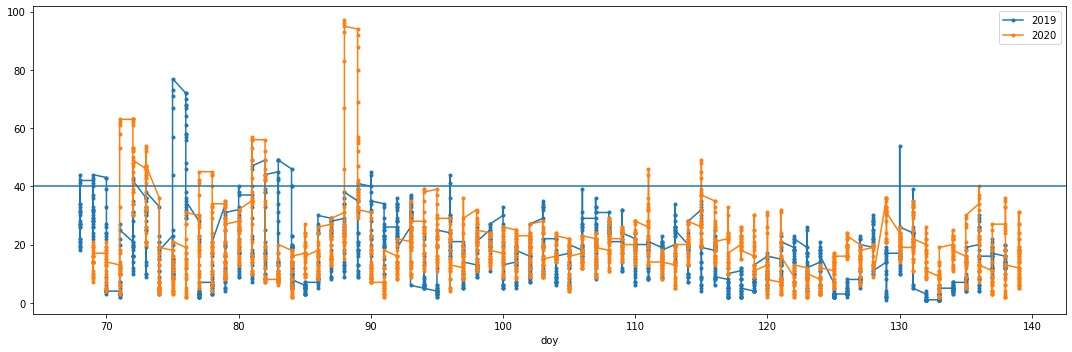

In [385]:
d19 = df_during2019.reset_index().set_index(
    ["Stazione", "Inquinante"]
).loc[station, pollutant]

d19["doy"] = d19.Data.dt.day_of_year

d20 = df_during2020.reset_index().set_index(
    ["Stazione", "Inquinante"]
).loc[station, pollutant]
d20["doy"] = d20.Data.dt.day_of_year

fig, ax = plt.subplots(figsize=(15, 5))
d19b.plot("doy", "Valore", label="2019", ax=ax, marker=".")
d20.plot("doy", "Valore", label="2020", ax=ax, marker=".")
# ax.axhline(40)

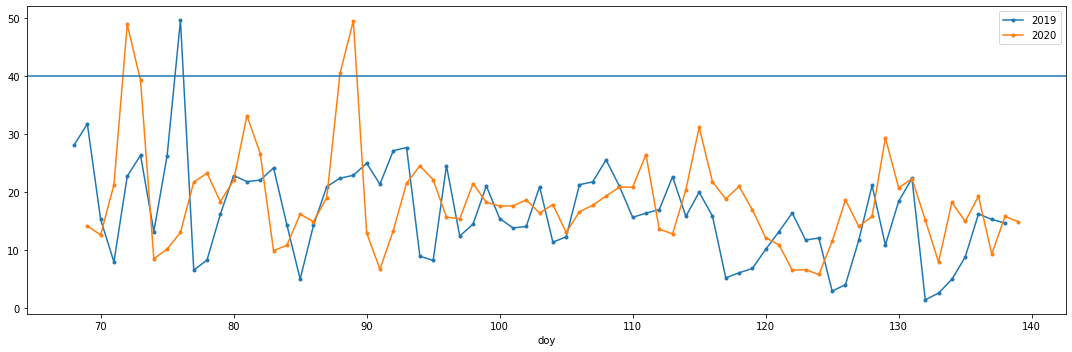

In [446]:
d19 = df_during2019.reset_index().set_index(
    ["Stazione", "Inquinante"]
).loc[station, pollutant]

d19["doy"] = d19.Data.dt.day_of_year

d20 = df_during2020.reset_index().set_index(
    ["Stazione", "Inquinante"]
).loc[station, pollutant]
d20["doy"] = d20.Data.dt.day_of_year

fig, ax = plt.subplots(figsize=(15, 5))
d19.groupby(d19.Data.dt.date).mean().plot("doy", "Valore", label="2019", ax=ax, marker=".")
d20.groupby(d20.Data.dt.date).mean().plot("doy", "Valore", label="2020", ax=ax, marker=".")
ax.axhline(40)

In [387]:
d1920 = pd.concat([d19.reset_index(), d20.reset_index()])
d1920["year"] = d1920.Data.dt.year
d1920

,Stazione,Inquinante,Data,Valore,Unità di misura,doy,year
0,Via Bolzano,PM10,2019-03-09 00:00:00,32.0,µg/mc,68,2019
1,Via Bolzano,PM10,2019-03-09 01:00:00,34.0,µg/mc,68,2019
2,Via Bolzano,PM10,2019-03-09 02:00:00,31.0,µg/mc,68,2019
3,Via Bolzano,PM10,2019-03-09 03:00:00,28.0,µg/mc,68,2019
4,Via Bolzano,PM10,2019-03-09 04:00:00,27.0,µg/mc,68,2019
...,...,...,...,...,...,...,...
1730,Via Bolzano,PM10,2020-05-18 21:00:00,24.0,µg/mc,139,2020
1731,Via Bolzano,PM10,2020-05-18 22:00:00,27.0,µg/mc,139,2020
1732,Via Bolzano,PM10,2020-05-18 22:00:00,27.0,µg/mc,139,2020
1733,Via Bolzano,PM10,2020-05-18 23:00:00,31.0,µg/mc,139,2020


In [388]:
fig = px.box(d1920, x="year", y="Valore")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [389]:
fig = px.histogram(d1920, x="Valore", color="year", marginal="box")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [435]:
import plotly.figure_factory as ff


fig = ff.create_distplot(
    [d19.Valore, d20.Valore], 
    ["2019", "2020"], 
    bin_size=2,
    show_rug=False,
    show_curve=False,
    show_hist=True,
)
# fig = px.histogram(d1920, x="Valore", color="year", marginal="box")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [390]:
fig = px.histogram(d1920.groupby(d1920.Data.dt.date).mean(), x="Valore", color="year", marginal="box")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

# t-test between all prev (2012-2019) and 2020 -- lockdown period

In [530]:
df_duringallprev = pd.concat(
    df.set_index("Data").loc[f"{year}-03-09":f"{year}-05-18"] 
    for year 
    in range(2012, 2020)
)
df_duringallprev

df_duringallprev["doy"] = df_duringallprev.index.day_of_year


In [440]:
pollutants = df_duringallprev.Inquinante.drop_duplicates()
stations = df_duringallprev.Stazione.drop_duplicates()

r = []

for pollutant in pollutants:
    for station in stations:

        df_test_allprev = (
            df_duringallprev
            .loc[
                (df_duringallprev.Inquinante == pollutant) 
                & (df_duringallprev.Stazione == station),
            ].reset_index()
        )
        df_test_allprev = df_test_allprev.groupby(df_test_allprev.Data.dt.date).mean()

        df_test_20 = (
            df_during2020
            .loc[
                (df_during2020.Inquinante == pollutant) 
                & (df_during2020.Stazione == station),
            ].reset_index()
        )
        df_test_20 = df_test_20.groupby(df_test_20.Data.dt.date).mean()


        p_value = sc.stats.ttest_ind(
            df_test_allprev.Valore,
            df_test_20.Valore,
            equal_var=False
        )

        r.append({
            "pollutant": pollutant,
            "station": station,
            "p_value": p_value.pvalue,
        })

r = pd.DataFrame(r)
r["significance"] = r.p_value < 0.05
r.dropna()

,pollutant,station,p_value,significance
0,Biossido di Azoto,Borgo Valsugana,1.101805e-26,True
1,Biossido di Azoto,Parco S. Chiara,2.809759e-22,True
2,Biossido di Azoto,Piana Rotaliana,1.069521e-26,True
3,Biossido di Azoto,Riva del Garda,6.721861e-30,True
4,Biossido di Azoto,Rovereto,1.903561e-33,True
5,Biossido di Azoto,Via Bolzano,4.581185e-35,True
6,Biossido di Azoto,A22 (Avio),5.278181e-30,True
7,Biossido di Azoto,Monte Gaza,1.913462e-01,False
8,Ozono,Borgo Valsugana,3.620429e-05,True
9,Ozono,Parco S. Chiara,1.837502e-07,True


In [615]:

avgstations = (
    df_duringallprev
    .reset_index()
    .groupby(["Stazione", "Inquinante", "doy"])
    .mean()
)
avgstations = avgstations.dropna()

avgstations.loc["Parco S. Chiara", "PM10"]

,Valore
doy,
68,20.993056
69,20.380208
70,21.093750
71,14.869792
72,20.239583
...,...
135,11.421875
136,12.085561
137,9.869792


In [618]:
df_during2020


,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2020-03-09 00:00:00,A22 (Avio),Biossido di Azoto,47.0,µg/mc
2020-03-09 01:00:00,A22 (Avio),Biossido di Azoto,41.0,µg/mc
2020-03-09 02:00:00,A22 (Avio),Biossido di Azoto,41.0,µg/mc
2020-03-09 03:00:00,A22 (Avio),Biossido di Azoto,34.0,µg/mc
2020-03-09 04:00:00,A22 (Avio),Biossido di Azoto,37.0,µg/mc
...,...,...,...,...
2020-05-18 21:00:00,Via Bolzano,PM10,24.0,µg/mc
2020-05-18 22:00:00,Via Bolzano,PM10,27.0,µg/mc
2020-05-18 22:00:00,Via Bolzano,PM10,27.0,µg/mc


In [622]:
duringavg2020 = pd.concat(
    df.set_index("Data").loc[f"{year}-03-09":f"{year}-05-18"] 
    for year 
    in range(2020, 2021)
)
duringavg2020

duringavg2020["doy"] = duringavg2020.index.day_of_year

In [623]:
duringavg2020

,Stazione,Inquinante,Valore,Unità di misura,doy
Data,,,,,
2020-03-09 00:00:00,A22 (Avio),Biossido di Azoto,47.0,µg/mc,69
2020-03-09 01:00:00,A22 (Avio),Biossido di Azoto,41.0,µg/mc,69
2020-03-09 02:00:00,A22 (Avio),Biossido di Azoto,41.0,µg/mc,69
2020-03-09 03:00:00,A22 (Avio),Biossido di Azoto,34.0,µg/mc,69
2020-03-09 04:00:00,A22 (Avio),Biossido di Azoto,37.0,µg/mc,69
...,...,...,...,...,...
2020-05-18 21:00:00,Via Bolzano,PM10,24.0,µg/mc,139
2020-05-18 22:00:00,Via Bolzano,PM10,27.0,µg/mc,139
2020-05-18 22:00:00,Via Bolzano,PM10,27.0,µg/mc,139


In [639]:
avgstations2020 = (
    duringavg2020
    .reset_index()
    .groupby(["Stazione", "Inquinante", "doy"])
    .mean()
)
avgstations2020 = avgstations2020.dropna()



,Valore
doy,
69,12.791667
70,11.875000
71,23.875000
72,44.458333
73,43.666667
...,...
135,17.291667
136,17.291667
137,9.916667


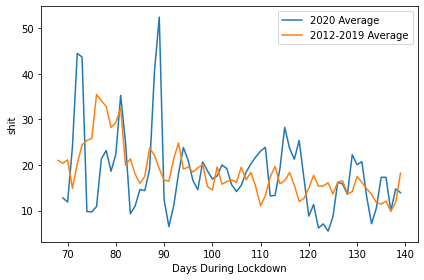

In [657]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

plt.plot(avgstations2020.loc["Parco S. Chiara", "PM10"], label="2020 Average")
plt.plot(avgstations.loc["Parco S. Chiara", "PM10"], label="2012-2019 Average")
plt.xlabel("Days During Lockdown")
plt.ylabel("shit")
plt.legend()
plt.show()

# Graphs denoting changes in each pollutant for each station over the "during" pandemic period in comparison to average of 2012-19

In [871]:
avgstations2020

Valore
Inquinante     doy          
Biossido Zolfo 69   2.000000
               70   1.958333
               71   1.750000
               72   1.750000
               73   2.041667
...                      ...
PM2.5          135  8.375000
               136  7.347222
               137  5.500000
               138  7.569444
               139  7.437037

[426 rows x 1 columns]

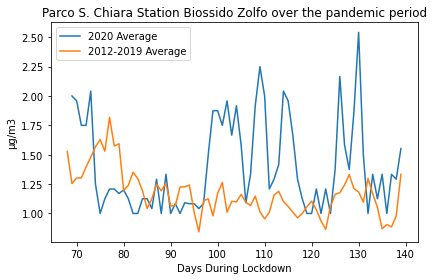

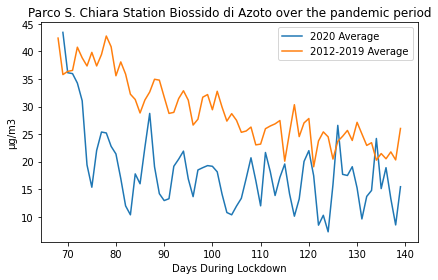

wasn't able to do Parco S. Chiara Ossido di Carbonio


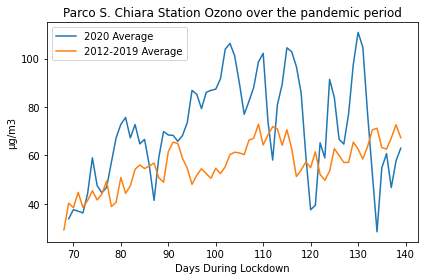

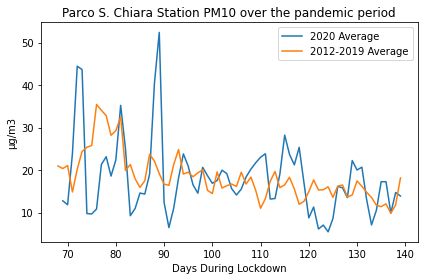

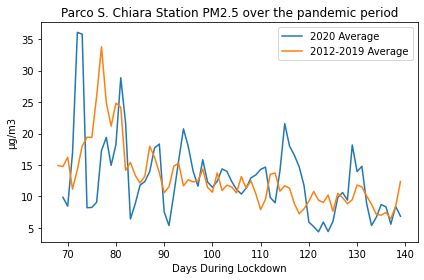

wasn't able to do Via Bolzano Biossido Zolfo


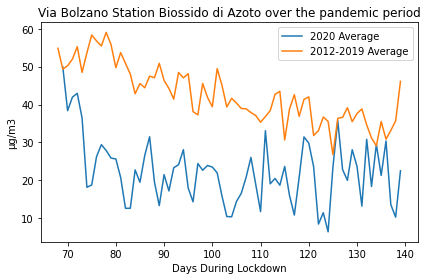

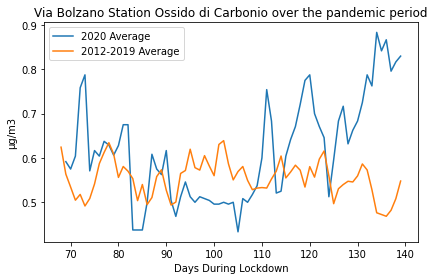

wasn't able to do Via Bolzano Ozono


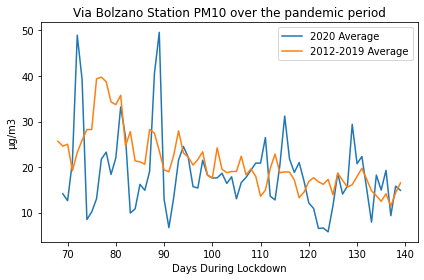

wasn't able to do Via Bolzano PM2.5
wasn't able to do Piana Rotaliana Biossido Zolfo


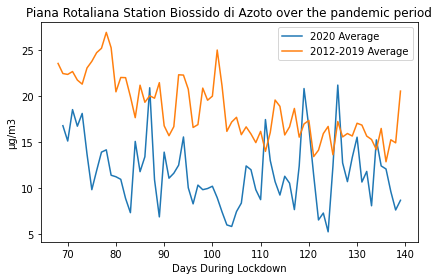

wasn't able to do Piana Rotaliana Ossido di Carbonio


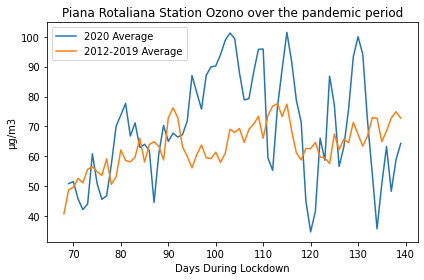

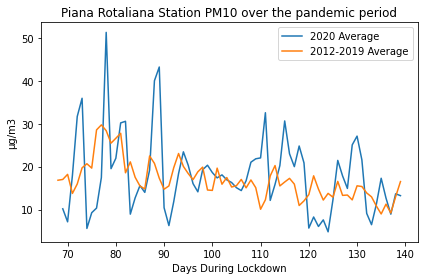

wasn't able to do Piana Rotaliana PM2.5
wasn't able to do Rovereto Biossido Zolfo


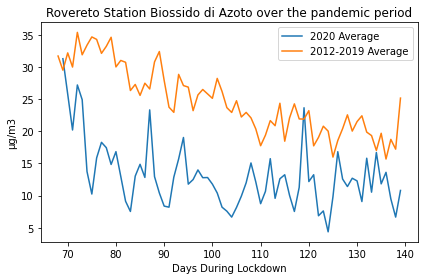

wasn't able to do Rovereto Ossido di Carbonio


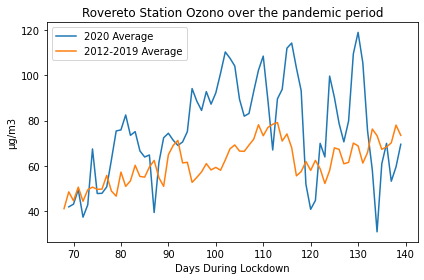

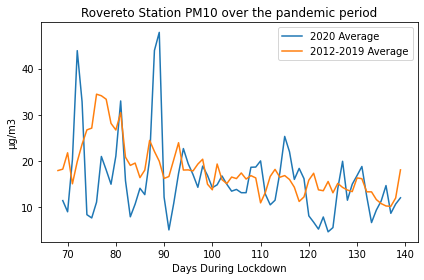

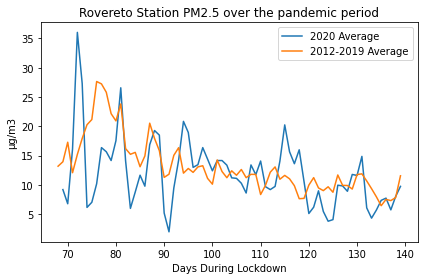

wasn't able to do Borgo Valsugana Biossido Zolfo


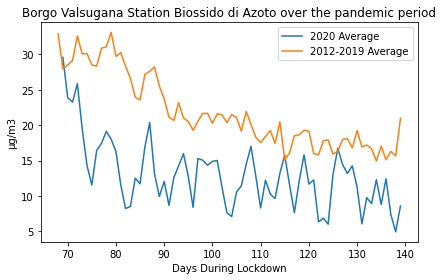

wasn't able to do Borgo Valsugana Ossido di Carbonio


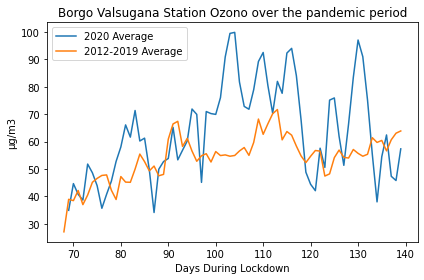

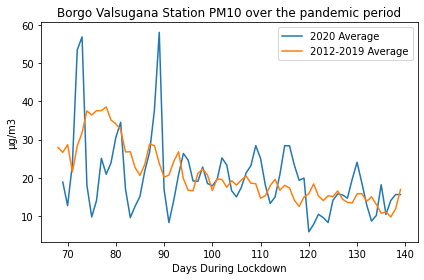

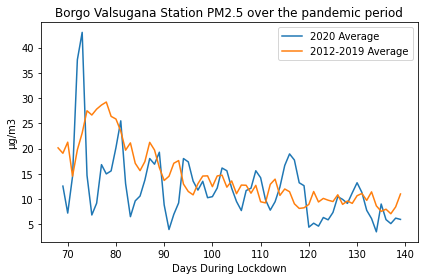

wasn't able to do Riva del Garda Biossido Zolfo


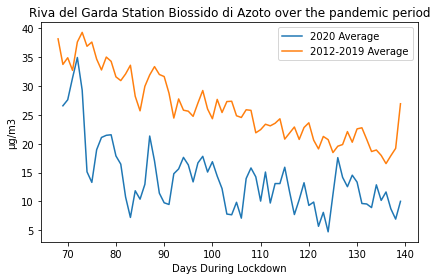

wasn't able to do Riva del Garda Ossido di Carbonio


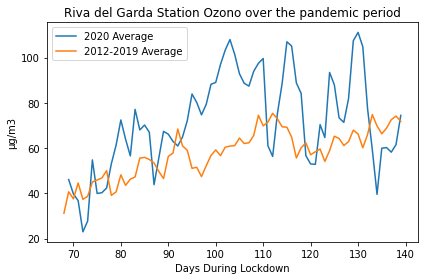

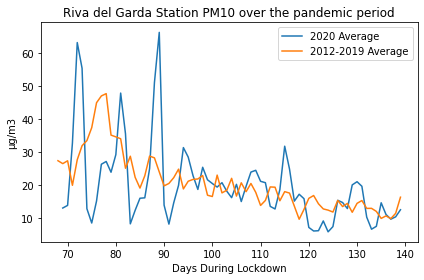

wasn't able to do Riva del Garda PM2.5
wasn't able to do A22 (Avio) Biossido Zolfo


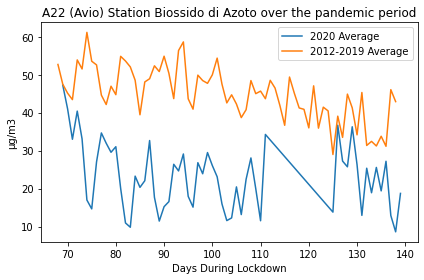

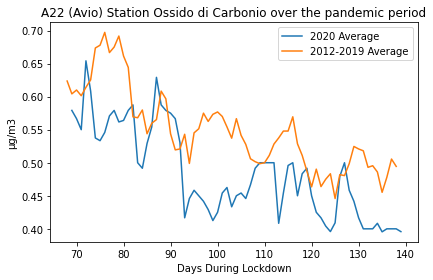

wasn't able to do A22 (Avio) Ozono


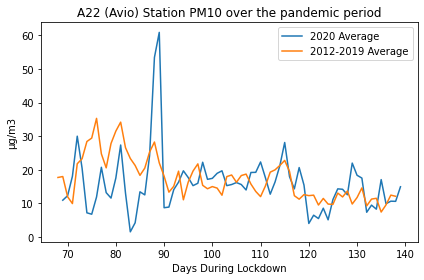

wasn't able to do A22 (Avio) PM2.5
wasn't able to do Monte Gaza Biossido Zolfo


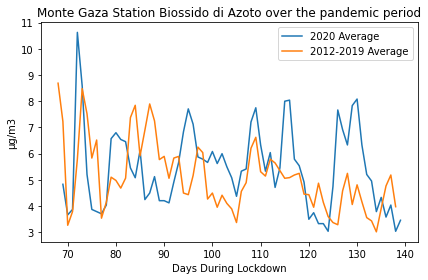

wasn't able to do Monte Gaza Ossido di Carbonio


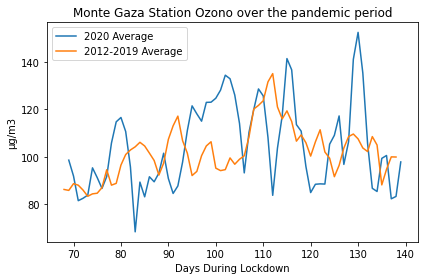

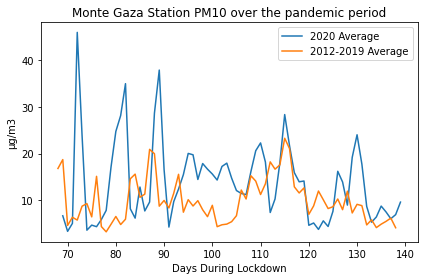

wasn't able to do Monte Gaza PM2.5


In [689]:
stations = ["Parco S. Chiara", "Via Bolzano", "Piana Rotaliana", "Rovereto" ,"Borgo Valsugana",	"Riva del Garda" ,"A22 (Avio)", "Monte Gaza"]
pollutans

for station in stations:
    for pol in pollutans:
        try:
            plt.plot(avgstations2020.loc[station, pol], label="2020 Average")
            plt.plot(avgstations.loc[station, pol], label="2012-2019 Average")
            plt.title(f"{station} Station {pol} over the pandemic period")
            plt.xlabel("Days During Lockdown")
            plt.ylabel("µg/m3")
            plt.legend()
            plt.show()
        except:
            print(f"wasn't able to do {station} {pol}")

# Graphs denoting changes in each pollutant over the "during" pandemic period in comparison to average of 2012-19 --> average of all stations

In [704]:
avgstations2020 = (
    duringavg2020
    .reset_index()
    .groupby(["Inquinante", "doy"])
    .mean()
)
avgstations2020 = avgstations2020.dropna()
avgstations2020

Valore
Inquinante     doy          
Biossido Zolfo 69   2.000000
               70   1.958333
               71   1.750000
               72   1.750000
               73   2.041667
...                      ...
PM2.5          135  8.375000
               136  7.347222
               137  5.500000
               138  7.569444
               139  7.437037

[426 rows x 1 columns]

In [705]:
avgstations = (
    df_duringallprev
    .reset_index()
    .groupby(["Inquinante", "doy"])
    .mean()
)
avgstations = avgstations.dropna()
avgstations

Valore
Inquinante     doy           
Biossido Zolfo 68    1.527778
               69    1.255208
               70    1.302083
               71    1.302083
               72    1.395833
...                       ...
PM2.5          135   6.996317
               136   7.655046
               137   6.958647
               138   8.233522
               139  11.706767

[432 rows x 1 columns]

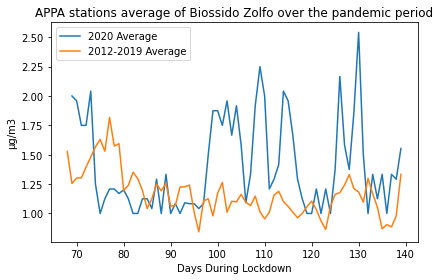

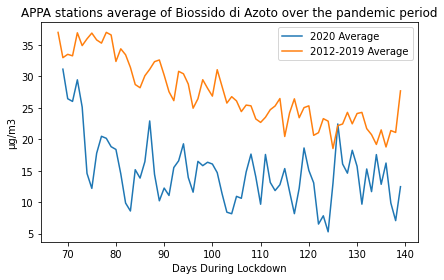

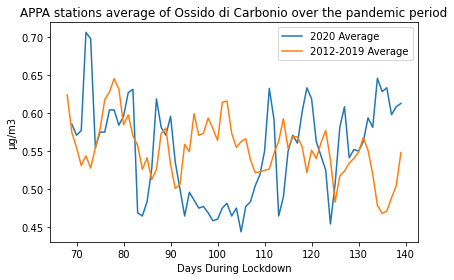

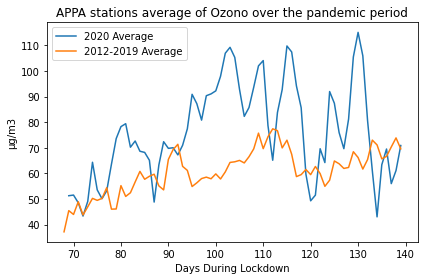

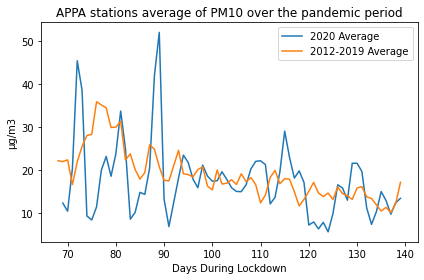

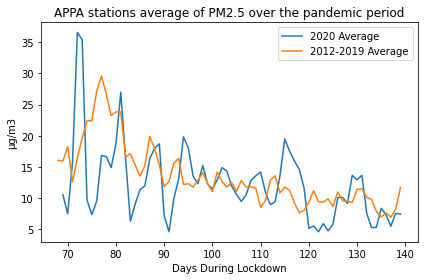

In [708]:
pollutans

for pol in pollutans:

    try:
        plt.plot(avgstations2020.loc[pol], label="2020 Average")
        plt.plot(avgstations.loc[pol], label="2012-2019 Average")
        plt.title(f"APPA stations average of {pol} over the pandemic period")
        plt.xlabel("Days During Lockdown")
        plt.ylabel("µg/m3")
        plt.legend()
        plt.show()
    except:
        print(f"wasn't able to do {pol}")

In [861]:
pollutans

['Biossido Zolfo',
 'Biossido di Azoto',
 'Ossido di Carbonio',
 'Ozono',
 'PM10',
 'PM2.5']

# Box plots comparing variance/spread of values for each pollutant each year during the COVID period

In [837]:

avgstations = (
    df_duringallprev
    .reset_index()
    .groupby(["Stazione", "Inquinante", "doy"])
    .mean()
)
avgstations = avgstations.dropna()

avgstations = avgstations.reset_index()
avgstations["year"] = "2012-2019"
avgstations

,Stazione,Inquinante,doy,Valore,year
0,A22 (Avio),Biossido di Azoto,68,52.700000,2012-2019
1,A22 (Avio),Biossido di Azoto,69,47.500000,2012-2019
2,A22 (Avio),Biossido di Azoto,70,45.134328,2012-2019
3,A22 (Avio),Biossido di Azoto,71,43.444444,2012-2019
4,A22 (Avio),Biossido di Azoto,72,53.897059,2012-2019
...,...,...,...,...,...
2005,Via Bolzano,PM10,135,12.479167,2012-2019
2006,Via Bolzano,PM10,136,14.151042,2012-2019
2007,Via Bolzano,PM10,137,11.447917,2012-2019
2008,Via Bolzano,PM10,138,14.382979,2012-2019


In [838]:
boxplot2020 = duringavg2020.reset_index().groupby(
    ["Stazione", "Inquinante", duringavg2020.index.date]
).mean().dropna().reset_index()
boxplot2020["year"] = "2020"
boxplot2020

,Stazione,Inquinante,level_2,Valore,doy,year
0,A22 (Avio),Biossido di Azoto,2020-03-09,47.250000,69.0,2020
1,A22 (Avio),Biossido di Azoto,2020-03-10,41.000000,70.0,2020
2,A22 (Avio),Biossido di Azoto,2020-03-11,33.000000,71.0,2020
3,A22 (Avio),Biossido di Azoto,2020-03-12,40.416667,72.0,2020
4,A22 (Avio),Biossido di Azoto,2020-03-13,33.083333,73.0,2020
...,...,...,...,...,...,...
1970,Via Bolzano,PM10,2020-05-14,14.958333,135.0,2020
1971,Via Bolzano,PM10,2020-05-15,19.291667,136.0,2020
1972,Via Bolzano,PM10,2020-05-16,9.333333,137.0,2020
1973,Via Bolzano,PM10,2020-05-17,15.833333,138.0,2020


In [839]:
boxplot2020 = boxplot2020[['Stazione', 'Inquinante', 'doy', 'Valore', 'year']]

In [840]:
boxplot = pd.concat([boxplot2020.reset_index(), avgstations.reset_index()])
boxplot

,index,Stazione,Inquinante,doy,Valore,year
0,0,A22 (Avio),Biossido di Azoto,69.0,47.250000,2020
1,1,A22 (Avio),Biossido di Azoto,70.0,41.000000,2020
2,2,A22 (Avio),Biossido di Azoto,71.0,33.000000,2020
3,3,A22 (Avio),Biossido di Azoto,72.0,40.416667,2020
4,4,A22 (Avio),Biossido di Azoto,73.0,33.083333,2020
...,...,...,...,...,...,...
2005,2005,Via Bolzano,PM10,135.0,12.479167,2012-2019
2006,2006,Via Bolzano,PM10,136.0,14.151042,2012-2019
2007,2007,Via Bolzano,PM10,137.0,11.447917,2012-2019
2008,2008,Via Bolzano,PM10,138.0,14.382979,2012-2019


In [841]:
boxplot.year = boxplot.year.astype("category")

In [842]:
boxplot.groupby("year").head()

,index,Stazione,Inquinante,doy,Valore,year
0,0,A22 (Avio),Biossido di Azoto,69.0,47.250000,2020
1,1,A22 (Avio),Biossido di Azoto,70.0,41.000000,2020
2,2,A22 (Avio),Biossido di Azoto,71.0,33.000000,2020
3,3,A22 (Avio),Biossido di Azoto,72.0,40.416667,2020
4,4,A22 (Avio),Biossido di Azoto,73.0,33.083333,2020
0,0,A22 (Avio),Biossido di Azoto,68.0,52.700000,2012-2019
1,1,A22 (Avio),Biossido di Azoto,69.0,47.500000,2012-2019
2,2,A22 (Avio),Biossido di Azoto,70.0,45.134328,2012-2019
3,3,A22 (Avio),Biossido di Azoto,71.0,43.444444,2012-2019
4,4,A22 (Avio),Biossido di Azoto,72.0,53.897059,2012-2019


In [845]:
for pol in pollutans:
    
    try:
        fig = px.box(boxplot[boxplot.Inquinante == pol], x="year", y="Valore", title=f"APPA stations distribution of {pol} during the pandemic period" )
        # fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
        
        fig.show()

    except:
        print(f"wasn't able to do {pol}")

In [848]:
for pol in pollutans:

    try:
        fig = px.histogram(boxplot[boxplot.Inquinante == pol], x="Valore", color="year", marginal="box", title=f"APPA stations distribution of {pol} during the pandemic period")
# fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
        fig.show()

    except:
        print(f"wasn't able to do {pol}")

In [ ]:
fig = px.histogram(boxplot[boxplot.Inquinante == pol], x="Valore", color="year", marginal="box", title=f"APPA stations distribution of {pol} during the pandemic period")

In [857]:
for pol in pollutans:


        fig = ff.create_distplot(
        [boxplot2020.Valore[boxplot2020.Inquinante == pol], avgstations.Valore[avgstations.Inquinante == pol]], 
        ["2012-2019", "2020"], 
        bin_size=2,
        show_rug=True,
        show_curve=True,
        show_hist=True,
        )
        # fig = px.histogram(d1920, x="Valore", color="year", marginal="box")
        # fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
        fig.update_layout(title_text=f"APPA stations distribution of {pol} during the pandemic period")
        fig.show()
    


# setting up data frames for before, during and after for 2020 period and 2012-19

In [ ]:
# also need to do this for the line graphs to validate there are no changes in years before

In [860]:
#during for 2012-2019 and 2020 concatenated
boxplot = pd.concat([boxplot2020.reset_index(), avgstations.reset_index()])
boxplot

,index,Stazione,Inquinante,doy,Valore,year
0,0,A22 (Avio),Biossido di Azoto,69.0,47.250000,2020
1,1,A22 (Avio),Biossido di Azoto,70.0,41.000000,2020
2,2,A22 (Avio),Biossido di Azoto,71.0,33.000000,2020
3,3,A22 (Avio),Biossido di Azoto,72.0,40.416667,2020
4,4,A22 (Avio),Biossido di Azoto,73.0,33.083333,2020
...,...,...,...,...,...,...
2005,2005,Via Bolzano,PM10,135.0,12.479167,2012-2019
2006,2006,Via Bolzano,PM10,136.0,14.151042,2012-2019
2007,2007,Via Bolzano,PM10,137.0,11.447917,2012-2019
2008,2008,Via Bolzano,PM10,138.0,14.382979,2012-2019


In [862]:
#before 

df_before


,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2012-01-01 01:00:00,Borgo Valsugana,Biossido di Azoto,37.0,µg/mc
2012-01-01 02:00:00,Borgo Valsugana,Biossido di Azoto,39.0,µg/mc
2012-01-01 03:00:00,Borgo Valsugana,Biossido di Azoto,36.0,µg/mc
2012-01-01 04:00:00,Borgo Valsugana,Biossido di Azoto,34.0,µg/mc
2012-01-01 05:00:00,Borgo Valsugana,Biossido di Azoto,31.0,µg/mc
...,...,...,...,...
2022-03-08 19:00:00,Via Bolzano,PM10,22.0,µg/mc
2022-03-08 20:00:00,Via Bolzano,PM10,29.0,µg/mc
2022-03-08 21:00:00,Via Bolzano,PM10,32.0,µg/mc


In [877]:
before2020 = pd.concat(
    df.set_index("Data").loc[f"{year}-01-01":f"{year}-03-08"] 
    for year 
    in range(2020, 2021)
)
before2020

before2020["doy"] = before2020.index.day_of_year

In [885]:
before_2020 = (
    before2020
    .reset_index()
    .groupby(["Stazione", "Inquinante", "doy"])
    .mean()
)
before_2020 = before_2020.dropna()

before_2020 = before_2020.reset_index()
before_2020["year"] = "2020"
before_2020

,Stazione,Inquinante,doy,Valore,year
0,A22 (Avio),Biossido di Azoto,1,62.916667,2020
1,A22 (Avio),Biossido di Azoto,2,62.750000,2020
2,A22 (Avio),Biossido di Azoto,3,65.875000,2020
3,A22 (Avio),Biossido di Azoto,4,69.875000,2020
4,A22 (Avio),Biossido di Azoto,5,68.375000,2020
...,...,...,...,...,...
1893,Via Bolzano,PM10,64,9.583333,2020
1894,Via Bolzano,PM10,65,20.583333,2020
1895,Via Bolzano,PM10,66,15.875000,2020
1896,Via Bolzano,PM10,67,6.714286,2020


In [880]:
df_beforeall = pd.concat(
    df.set_index("Data").loc[f"{year}-01-01":f"{year}-03-8"] 
    for year 
    in range(2012, 2020)
)
df_beforeall

df_beforeall["doy"] = df_beforeall.index.day_of_year


/var/folders/_c/fvfck0397w75sly9yb8mm1jm0000gn/T/ipykernel_3222/3950605013.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [884]:
all_before = (
    df_beforeall
    .reset_index()
    .groupby(["Stazione", "Inquinante", "doy"])
    .mean()
)
all_before = all_before.dropna()

all_before = all_before.reset_index()
all_before["year"] = "2012-2019"
all_before

,Stazione,Inquinante,doy,Valore,year
0,A22 (Avio),Biossido di Azoto,1,81.295775,2012-2019
1,A22 (Avio),Biossido di Azoto,2,75.785714,2012-2019
2,A22 (Avio),Biossido di Azoto,3,59.611111,2012-2019
3,A22 (Avio),Biossido di Azoto,4,69.700000,2012-2019
4,A22 (Avio),Biossido di Azoto,5,71.041667,2012-2019
...,...,...,...,...,...
1893,Via Bolzano,PM10,64,28.378947,2012-2019
1894,Via Bolzano,PM10,65,24.378947,2012-2019
1895,Via Bolzano,PM10,66,24.705882,2012-2019
1896,Via Bolzano,PM10,67,24.255208,2012-2019


In [863]:
#after 
df_after

,Stazione,Inquinante,Valore,Unità di misura
Data,,,,
2012-05-19 00:00:00,Borgo Valsugana,Biossido di Azoto,36.0,µg/mc
2012-05-19 01:00:00,Borgo Valsugana,Biossido di Azoto,30.0,µg/mc
2012-05-19 02:00:00,Borgo Valsugana,Biossido di Azoto,27.0,µg/mc
2012-05-19 03:00:00,Borgo Valsugana,Biossido di Azoto,25.0,µg/mc
2012-05-19 04:00:00,Borgo Valsugana,Biossido di Azoto,21.0,µg/mc
...,...,...,...,...
2022-07-07 20:00:00,Via Bolzano,PM10,15.0,µg/mc
2022-07-07 21:00:00,Via Bolzano,PM10,13.0,µg/mc
2022-07-07 22:00:00,Via Bolzano,PM10,16.0,µg/mc


In [886]:
df_afterall = pd.concat(
    df.set_index("Data").loc[f"{year}-05-19":f"{year}-07-27"] 
    for year 
    in range(2012, 2020)
)
df_afterall

df_afterall["doy"] = df_afterall.index.day_of_year

In [887]:
all_after = (
    df_afterall
    .reset_index()
    .groupby(["Stazione", "Inquinante", "doy"])
    .mean()
)
all_after = all_after.dropna()

all_after = all_after.reset_index()
all_after["year"] = "2012-2019"
all_after

,Stazione,Inquinante,doy,Valore,year
0,A22 (Avio),Biossido di Azoto,139,51.180556,2012-2019
1,A22 (Avio),Biossido di Azoto,140,28.916667,2012-2019
2,A22 (Avio),Biossido di Azoto,141,36.291667,2012-2019
3,A22 (Avio),Biossido di Azoto,142,44.550725,2012-2019
4,A22 (Avio),Biossido di Azoto,143,41.045455,2012-2019
...,...,...,...,...,...
1977,Via Bolzano,PM10,205,22.146597,2012-2019
1978,Via Bolzano,PM10,206,19.119792,2012-2019
1979,Via Bolzano,PM10,207,17.572917,2012-2019
1980,Via Bolzano,PM10,208,17.302083,2012-2019


In [888]:
df_after2020 = pd.concat(
    df.set_index("Data").loc[f"{year}-05-19":f"{year}-07-27"] 
    for year 
    in range(2020, 2021)
)
df_after2020

df_after2020["doy"] = df_after2020.index.day_of_year

In [890]:
after_2020 = (
    df_after2020
    .reset_index()
    .groupby(["Stazione", "Inquinante", "doy"])
    .mean()
)
after_2020 = after_2020.dropna()

after_2020 = after_2020.reset_index()
after_2020["year"] = "2012-2019"
after_2020

,Stazione,Inquinante,doy,Valore,year
0,A22 (Avio),Biossido di Azoto,140,22.920000,2012-2019
1,A22 (Avio),Biossido di Azoto,141,20.750000,2012-2019
2,A22 (Avio),Biossido di Azoto,142,24.458333,2012-2019
3,A22 (Avio),Biossido di Azoto,143,30.291667,2012-2019
4,A22 (Avio),Biossido di Azoto,144,19.583333,2012-2019
...,...,...,...,...,...
1949,Via Bolzano,PM10,205,13.041667,2012-2019
1950,Via Bolzano,PM10,206,13.916667,2012-2019
1951,Via Bolzano,PM10,207,8.625000,2012-2019
1952,Via Bolzano,PM10,208,13.541667,2012-2019


# Box plots comparing variance/spread of values for each pollutant each year before, during and after the COVID period

In [891]:
boxplotbefore = pd.concat([before_2020.reset_index(), all_before.reset_index()])
boxplotbefore

,index,Stazione,Inquinante,doy,Valore,year
0,0,A22 (Avio),Biossido di Azoto,1,62.916667,2020
1,1,A22 (Avio),Biossido di Azoto,2,62.750000,2020
2,2,A22 (Avio),Biossido di Azoto,3,65.875000,2020
3,3,A22 (Avio),Biossido di Azoto,4,69.875000,2020
4,4,A22 (Avio),Biossido di Azoto,5,68.375000,2020
...,...,...,...,...,...,...
1893,1893,Via Bolzano,PM10,64,28.378947,2012-2019
1894,1894,Via Bolzano,PM10,65,24.378947,2012-2019
1895,1895,Via Bolzano,PM10,66,24.705882,2012-2019
1896,1896,Via Bolzano,PM10,67,24.255208,2012-2019


In [893]:
boxplot

,index,Stazione,Inquinante,doy,Valore,year
0,0,A22 (Avio),Biossido di Azoto,69.0,47.250000,2020
1,1,A22 (Avio),Biossido di Azoto,70.0,41.000000,2020
2,2,A22 (Avio),Biossido di Azoto,71.0,33.000000,2020
3,3,A22 (Avio),Biossido di Azoto,72.0,40.416667,2020
4,4,A22 (Avio),Biossido di Azoto,73.0,33.083333,2020
...,...,...,...,...,...,...
2005,2005,Via Bolzano,PM10,135.0,12.479167,2012-2019
2006,2006,Via Bolzano,PM10,136.0,14.151042,2012-2019
2007,2007,Via Bolzano,PM10,137.0,11.447917,2012-2019
2008,2008,Via Bolzano,PM10,138.0,14.382979,2012-2019


In [892]:
boxplotafter = pd.concat([all_after.reset_index(), after_2020.reset_index()])
boxplotafter

,index,Stazione,Inquinante,doy,Valore,year
0,0,A22 (Avio),Biossido di Azoto,139,51.180556,2012-2019
1,1,A22 (Avio),Biossido di Azoto,140,28.916667,2012-2019
2,2,A22 (Avio),Biossido di Azoto,141,36.291667,2012-2019
3,3,A22 (Avio),Biossido di Azoto,142,44.550725,2012-2019
4,4,A22 (Avio),Biossido di Azoto,143,41.045455,2012-2019
...,...,...,...,...,...,...
1949,1949,Via Bolzano,PM10,205,13.041667,2012-2019
1950,1950,Via Bolzano,PM10,206,13.916667,2012-2019
1951,1951,Via Bolzano,PM10,207,8.625000,2012-2019
1952,1952,Via Bolzano,PM10,208,13.541667,2012-2019
